## Obter e analisar dados de fundos de investimento

Objetivo: Obter dados de fundos de investimento direto da fonte: o portal de dados da CVM.

Vamos processar estes dados para posteriormente analisá-los.

Queremos responder algumas perguntas importantes, como:

1. Qual fundo do Brasil tem o maior PL (patrimônio líquido)?
2. Como obter a variação da cota para um fundo específico?
3. Como recuperar dados de um fundo específico sabendo apenas o seu nome?
4. Qual o fundo que teve a cota que mais subiu?
5. Qual o fundo que teve a cota que mais caiu?

##### Sites utilizados

Para dados de desempenho dos fundos:

https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/

Para dados cadastrais dos fundos:

http://dados.cvm.gov.br/dados/FI/CAD/DADOS/

#### 1. Extração e processamento dos dados de desempenho

##### 1.1. Importação das bibliotecas

In [ ]:
import zipfile
import io
import requests
import pandas as pd
from datetime import date
from datetime import timedelta

##### 1.2. Captura dos dados

In [74]:
data = '2023-08-31'
ano_mes = '202308'


In [75]:
arquivo = f'inf_diario_fi_{ano_mes}.csv'
link = f'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{ano_mes}.zip'

In [76]:
r = requests.get(link)
r

<Response [200]>

In [77]:
zf = zipfile.ZipFile(io.BytesIO(r.content))

In [78]:
arquivo_fi = zf.open(arquivo)

In [79]:
linhas = arquivo_fi.readlines()

In [80]:
linhas = [i.strip().decode('ISO-8859-1') for i in linhas]

In [81]:
linhas = [i.split(';') for i in linhas]

In [82]:
linhas[0]

['TP_FUNDO',
 'CNPJ_FUNDO',
 'DT_COMPTC',
 'VL_TOTAL',
 'VL_QUOTA',
 'VL_PATRIM_LIQ',
 'CAPTC_DIA',
 'RESG_DIA',
 'NR_COTST']

In [83]:
df = pd.DataFrame(linhas, columns = linhas[0])
df

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
1,FI,00.017.024/0001-53,2023-08-01,1101441.42,32.897993900000,1106879.33,0.00,0.00,1
2,FI,00.017.024/0001-53,2023-08-02,1102008.01,32.912367200000,1107362.93,0.00,0.00,1
3,FI,00.017.024/0001-53,2023-08-03,1102567.38,32.926972300000,1107854.33,0.00,0.00,1
4,FI,00.017.024/0001-53,2023-08-04,1103126.46,32.940791500000,1108319.29,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...
578654,FI,97.929.213/0001-34,2023-08-25,84412931.79,11.107729430000,84411205.20,0.00,0.00,2
578655,FI,97.929.213/0001-34,2023-08-28,84459070.59,11.113726200000,84456776.59,0.00,0.00,2
578656,FI,97.929.213/0001-34,2023-08-29,84695430.03,11.144754210000,84692568.40,0.00,0.00,2
578657,FI,97.929.213/0001-34,2023-08-30,84718705.72,11.147742230000,84715275.32,0.00,0.00,2


In [84]:
informes_diarios = df[1:].reset_index()

In [85]:
informes_diarios.dtypes

index             int64
TP_FUNDO         object
CNPJ_FUNDO       object
DT_COMPTC        object
VL_TOTAL         object
VL_QUOTA         object
VL_PATRIM_LIQ    object
CAPTC_DIA        object
RESG_DIA         object
NR_COTST         object
dtype: object

In [86]:
informes_diarios[['VL_TOTAL', 'VL_QUOTA', 'VL_PATRIM_LIQ', 'CAPTC_DIA', 'RESG_DIA', 'NR_COTST']] = informes_diarios[['VL_TOTAL', 'VL_QUOTA', 'VL_PATRIM_LIQ', 'CAPTC_DIA', 'RESG_DIA', 'NR_COTST']].apply(pd.to_numeric)


In [87]:
informes_diarios.dtypes

index              int64
TP_FUNDO          object
CNPJ_FUNDO        object
DT_COMPTC         object
VL_TOTAL         float64
VL_QUOTA         float64
VL_PATRIM_LIQ    float64
CAPTC_DIA        float64
RESG_DIA         float64
NR_COTST           int64
dtype: object

In [88]:
informes_diarios.head()

,index,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,1,FI,00.017.024/0001-53,2023-08-01,1101441.42,32.897994,1106879.33,0.0,0.00,1
1,2,FI,00.017.024/0001-53,2023-08-02,1102008.01,32.912367,1107362.93,0.0,0.00,1
2,3,FI,00.017.024/0001-53,2023-08-03,1102567.38,32.926972,1107854.33,0.0,0.00,1
3,4,FI,00.017.024/0001-53,2023-08-04,1103126.46,32.940792,1108319.29,0.0,0.00,1
4,5,FI,00.017.024/0001-53,2023-08-07,1100901.02,32.955173,1106116.33,0.0,2686.84,1


In [89]:
informes_diarios.shape

(578658, 10)

#### 2. Análises preliminares

In [90]:
informes_diarios.DT_COMPTC.unique()

array(['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04',
       '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10',
       '2023-08-11', '2023-08-14', '2023-08-15', '2023-08-16',
       '2023-08-17', '2023-08-18', '2023-08-21', '2023-08-22',
       '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-28',
       '2023-08-29', '2023-08-30', '2023-08-31'], dtype=object)

##### 2.1. Variação da cota

In [91]:
cnpj_fundo_maior_pl = informes_diarios.sort_values('VL_PATRIM_LIQ').CNPJ_FUNDO.iloc[-1]
cnpj_fundo_maior_pl

'07.593.972/0001-86'

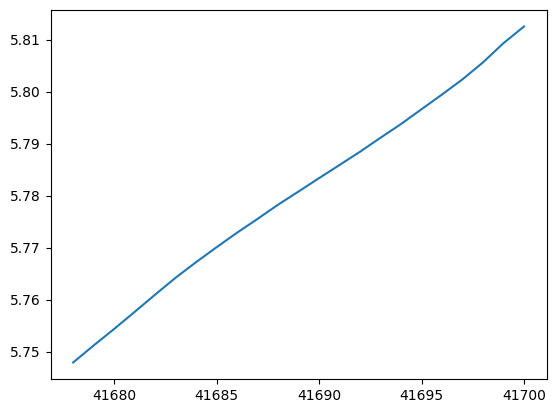

In [92]:
var_cota = informes_diarios[informes_diarios['CNPJ_FUNDO'] == cnpj_fundo_maior_pl]

var_cota.VL_QUOTA.plot();

#### 3. Análises com dados cadastrais

##### 3.1. Extração dos dados de cadastro

In [93]:
url = "http://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv"

In [94]:
cadastral = pd.read_csv(url, sep = ';', encoding = 'ISO-8859-1')

C:\Users\Robson\AppData\Local\Temp\ipykernel_49992\1026769091.py:1: DtypeWarning: Columns (14,17,18,20,22,24,27,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  cadastral = pd.read_csv(url, sep = ';', encoding = 'ISO-8859-1')


In [95]:
cadastral.head()

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
0,FACFIF,00.000.684/0001-21,DEUTSCHE BANK FDO APLIC QUOTAS FDO INV FINANCE...,2003-04-30,1994-12-20,19.0,2000-08-01,CANCELADA,2000-08-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FACFIF,00.000.731/0001-37,ITAMARITI CASH FUNDO APLICACAO QUOTAS FDOS INV...,2003-04-30,1994-05-18,40681.0,1996-01-26,CANCELADA,1996-01-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FACFIF,00.000.732/0001-81,FUNDO APLIC. QUOTAS DE F.I. SANTANDER CURTO PRAZO,2003-04-30,1994-05-24,27.0,1999-09-03,CANCELADA,1999-09-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FACFIF,00.000.740/0001-28,FUNDO DE APLIC EM QUOTAS DE FUNDOS DE INV BMC ...,2003-04-30,1994-05-23,40690.0,1996-06-10,CANCELADA,1996-06-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FACFIF,00.000.749/0001-39,BALANCE FUNDO APLICACAO QUOTAS FUNDO INVESTIME...,2003-04-30,1994-05-12,35.0,2000-06-26,CANCELADA,2000-06-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
cadastral.shape

(74483, 41)

In [97]:
df_cadastral = cadastral.dropna(subset=['GESTOR', 'CLASSE_ANBIMA', 'CLASSE'])

##### 3.2. Fundo de maior PL (patrimônio líquido)

In [98]:
df_cadastral.SIT.unique()

array(['EM FUNCIONAMENTO NORMAL', 'CANCELADA', 'LIQUIDAÇÃO',
       'FASE PRÉ-OPERACIONAL'], dtype=object)

In [99]:
df_cadastral.columns

Index(['TP_FUNDO', 'CNPJ_FUNDO', 'DENOM_SOCIAL', 'DT_REG', 'DT_CONST',
       'CD_CVM', 'DT_CANCEL', 'SIT', 'DT_INI_SIT', 'DT_INI_ATIV',
       'DT_INI_EXERC', 'DT_FIM_EXERC', 'CLASSE', 'DT_INI_CLASSE',
       'RENTAB_FUNDO', 'CONDOM', 'FUNDO_COTAS', 'FUNDO_EXCLUSIVO',
       'TRIB_LPRAZO', 'PUBLICO_ALVO', 'ENTID_INVEST', 'TAXA_PERFM',
       'INF_TAXA_PERFM', 'TAXA_ADM', 'INF_TAXA_ADM', 'VL_PATRIM_LIQ',
       'DT_PATRIM_LIQ', 'DIRETOR', 'CNPJ_ADMIN', 'ADMIN', 'PF_PJ_GESTOR',
       'CPF_CNPJ_GESTOR', 'GESTOR', 'CNPJ_AUDITOR', 'AUDITOR',
       'CNPJ_CUSTODIANTE', 'CUSTODIANTE', 'CNPJ_CONTROLADOR', 'CONTROLADOR',
       'INVEST_CEMPR_EXTER', 'CLASSE_ANBIMA'],
      dtype='object')

In [100]:
pl_fundos = df_cadastral[['DENOM_SOCIAL', 'VL_PATRIM_LIQ', 'CLASSE', 'PUBLICO_ALVO', 'TAXA_ADM', 'TAXA_PERFM', 'GESTOR', 'CNPJ_FUNDO', 'SIT']]
pl_fundos

,DENOM_SOCIAL,VL_PATRIM_LIQ,CLASSE,PUBLICO_ALVO,TAXA_ADM,TAXA_PERFM,GESTOR,CNPJ_FUNDO,SIT
5290,FUNDO DE INVESTIMENTO RENDA FIXA EXPONENCIAL,1.121717e+06,Fundo de Renda Fixa,Qualificado,0.30,0.0,BRAM - BRADESCO ASSET MANAGEMENT S.A. DISTRIBU...,00.017.024/0001-53,EM FUNCIONAMENTO NORMAL
5291,FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE IN...,3.811159e+07,Fundo de Renda Fixa,Público Geral,1.50,0.0,CAIXA DISTRIBUIDORA DE TÍTULOS E VALORES MOBIL...,00.068.305/0001-35,EM FUNCIONAMENTO NORMAL
5292,BB RENDA FIXA AUTOMÁTICO EMPRESA SIMPLES FUNDO...,2.093955e+09,Fundo de Renda Fixa,Público Geral,1.75,0.0,BB GESTAO DE RECURSOS DTVM S.A,00.071.477/0001-68,EM FUNCIONAMENTO NORMAL
5293,BB BESC RENDA FIXA PRÁTICO CRÉDITO PRIVADO FUN...,1.234050e+07,Fundo de Renda Fixa,Público Geral,1.00,0.0,BB GESTAO DE RECURSOS DTVM S.A,00.073.041/0001-08,EM FUNCIONAMENTO NORMAL
5296,OPP I FUNDO DE INVESTIMENTO EM AÇÕES BDR NÍVEL...,1.710641e+10,Fundo de Ações,Profissional,0.01,0.0,OPPORTUNITY HDF ADMINISTRADORA DE RECURSOS LTDA.,00.083.181/0001-67,EM FUNCIONAMENTO NORMAL
...,...,...,...,...,...,...,...,...,...
57651,DYNAMIC II - FUNDO DE INVESTIMENTO MULTIMERCAD...,6.163953e+07,Fundo Multimercado,Profissional,5.00,0.0,JGP GESTÃO PATRIMONIAL LTDA,97.548.164/0001-90,EM FUNCIONAMENTO NORMAL
57653,JGP STRATEGY MASTER FUNDO DE INVESTIMENTO MULT...,4.478342e+09,Fundo Multimercado,Público Geral,0.15,0.0,JGP GESTÃO DE RECURSOS LTDA,97.548.167/0001-23,EM FUNCIONAMENTO NORMAL
57663,953 FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS D...,9.060111e+07,Fundo Multimercado,Profissional,0.00,0.0,WRIGHT CAPITAL GESTAO DE RECURSOS LTDA,97.711.801/0001-05,EM FUNCIONAMENTO NORMAL
57668,LECT FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...,1.334371e+08,Fundo de Ações,Qualificado,1.35,15.0,ATMOS CAPITAL GESTÃO DE RECURSOS LTDA,97.929.197/0001-80,EM FUNCIONAMENTO NORMAL


In [101]:
pl_fundos = pl_fundos[pl_fundos['SIT'] == 'EM FUNCIONAMENTO NORMAL']
pl_fundos

,DENOM_SOCIAL,VL_PATRIM_LIQ,CLASSE,PUBLICO_ALVO,TAXA_ADM,TAXA_PERFM,GESTOR,CNPJ_FUNDO,SIT
5290,FUNDO DE INVESTIMENTO RENDA FIXA EXPONENCIAL,1.121717e+06,Fundo de Renda Fixa,Qualificado,0.30,0.0,BRAM - BRADESCO ASSET MANAGEMENT S.A. DISTRIBU...,00.017.024/0001-53,EM FUNCIONAMENTO NORMAL
5291,FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE IN...,3.811159e+07,Fundo de Renda Fixa,Público Geral,1.50,0.0,CAIXA DISTRIBUIDORA DE TÍTULOS E VALORES MOBIL...,00.068.305/0001-35,EM FUNCIONAMENTO NORMAL
5292,BB RENDA FIXA AUTOMÁTICO EMPRESA SIMPLES FUNDO...,2.093955e+09,Fundo de Renda Fixa,Público Geral,1.75,0.0,BB GESTAO DE RECURSOS DTVM S.A,00.071.477/0001-68,EM FUNCIONAMENTO NORMAL
5293,BB BESC RENDA FIXA PRÁTICO CRÉDITO PRIVADO FUN...,1.234050e+07,Fundo de Renda Fixa,Público Geral,1.00,0.0,BB GESTAO DE RECURSOS DTVM S.A,00.073.041/0001-08,EM FUNCIONAMENTO NORMAL
5296,OPP I FUNDO DE INVESTIMENTO EM AÇÕES BDR NÍVEL...,1.710641e+10,Fundo de Ações,Profissional,0.01,0.0,OPPORTUNITY HDF ADMINISTRADORA DE RECURSOS LTDA.,00.083.181/0001-67,EM FUNCIONAMENTO NORMAL
...,...,...,...,...,...,...,...,...,...
57651,DYNAMIC II - FUNDO DE INVESTIMENTO MULTIMERCAD...,6.163953e+07,Fundo Multimercado,Profissional,5.00,0.0,JGP GESTÃO PATRIMONIAL LTDA,97.548.164/0001-90,EM FUNCIONAMENTO NORMAL
57653,JGP STRATEGY MASTER FUNDO DE INVESTIMENTO MULT...,4.478342e+09,Fundo Multimercado,Público Geral,0.15,0.0,JGP GESTÃO DE RECURSOS LTDA,97.548.167/0001-23,EM FUNCIONAMENTO NORMAL
57663,953 FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS D...,9.060111e+07,Fundo Multimercado,Profissional,0.00,0.0,WRIGHT CAPITAL GESTAO DE RECURSOS LTDA,97.711.801/0001-05,EM FUNCIONAMENTO NORMAL
57668,LECT FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...,1.334371e+08,Fundo de Ações,Qualificado,1.35,15.0,ATMOS CAPITAL GESTÃO DE RECURSOS LTDA,97.929.197/0001-80,EM FUNCIONAMENTO NORMAL


In [102]:
pl_fundos = pl_fundos.sort_values('VL_PATRIM_LIQ', ascending=False).head()
pl_fundos

,DENOM_SOCIAL,VL_PATRIM_LIQ,CLASSE,PUBLICO_ALVO,TAXA_ADM,TAXA_PERFM,GESTOR,CNPJ_FUNDO,SIT
12165,BRASILPREV TOP TPF FUNDO DE INVESTIMENTO RENDA...,1.606795e+11,Fundo de Renda Fixa,Profissional,0.00,0.0,BB GESTAO DE RECURSOS DTVM S.A,07.593.972/0001-86,EM FUNCIONAMENTO NORMAL
49661,BB RENDA FIXA CURTO PRAZO AUTOMÁTICO FUNDO DE ...,1.286035e+11,Fundo de Renda Fixa,Público Geral,NaN,NaN,BB GESTAO DE RECURSOS DTVM S.A,42.592.315/0001-15,EM FUNCIONAMENTO NORMAL
53035,BB TOP RENDA FIXA CURTO PRAZO AUTOMÁTICO II FU...,1.286032e+11,Fundo de Renda Fixa,Público Geral,0.75,0.0,BB GESTAO DE RECURSOS DTVM S.A,46.133.770/0001-03,EM FUNCIONAMENTO NORMAL
5422,BB RF IV FUNDO DE INVESTIMENTO RENDA FIXA LONG...,1.070840e+11,Fundo de Renda Fixa,Profissional,0.00,0.0,BB GESTAO DE RECURSOS DTVM S.A,00.822.055/0001-87,EM FUNCIONAMENTO NORMAL
5831,SPECIAL RENDA FIXA REFERENCIADO DI - FUNDO DE ...,9.056639e+10,Fundo de Renda Fixa,Público Geral,0.00,0.0,ITAU UNIBANCO ASSET MANAGEMENT LTDA.,01.597.187/0001-15,EM FUNCIONAMENTO NORMAL


##### 3.3. Retornando um fundo de acordo com o nome

In [103]:
fundos_filtro_nome = df_cadastral[df_cadastral['DENOM_SOCIAL'].str.contains('ALASKA BLACK')]
fundos_filtro_nome

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
20636,FI,12.055.107/0001-16,ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM A...,2010-07-31,2010-06-02,145238.0,NaN,EM FUNCIONAMENTO NORMAL,2010-09-17,2010-09-17,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Ações Livre
21688,FI,12.987.743/0001-86,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,2011-01-12,2011-01-12,154849.0,NaN,EM FUNCIONAMENTO NORMAL,2011-01-24,2011-01-24,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Ações Livre
33475,FI,26.648.868/0001-96,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,2016-12-29,2016-12-28,270652.0,NaN,EM FUNCIONAMENTO NORMAL,2017-01-03,2017-01-03,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Ações Livre
38973,FI,32.757.743/0001-05,ALASKA BLACK ADVISORY XP SEGUROS PREVIDÊNCIA F...,2019-08-29,2019-08-27,334723.0,NaN,EM FUNCIONAMENTO NORMAL,2019-11-01,2019-11-01,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre
38974,FI,32.757.743/0001-05,ALASKA BLACK ADVISORY XP SEGUROS PREVIDÊNCIA F...,2019-08-29,2019-08-27,334723.0,NaN,EM FUNCIONAMENTO NORMAL,2019-11-01,2019-11-01,...,29.408.732/0001-05,XP VIDA E PREVIDÊNCIA S.A.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre
38983,FI,32.760.103/0001-46,ALASKA BLACK ADVISORY XP SEGUROS FIFE PREVIDÊN...,2019-08-29,2019-08-27,334731.0,NaN,EM FUNCIONAMENTO NORMAL,2019-10-31,2019-10-31,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre
38984,FI,32.760.103/0001-46,ALASKA BLACK ADVISORY XP SEGUROS FIFE PREVIDÊN...,2019-08-29,2019-08-27,334731.0,NaN,EM FUNCIONAMENTO NORMAL,2019-10-31,2019-10-31,...,29.408.732/0001-05,XP VIDA E PREVIDÊNCIA S.A.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre
38990,FI,32.761.323/0001-94,ALASKA BLACK ADVISORY XP SEGUROS PREVIDENCIÁRI...,2019-08-29,2019-08-27,334758.0,NaN,EM FUNCIONAMENTO NORMAL,2019-10-31,2019-10-31,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre
42214,FI,35.939.700/0001-20,ALASKA BLACK 70 ADVISORY XP SEGUROS PREVIDENCI...,2020-03-26,2020-03-26,358347.0,NaN,EM FUNCIONAMENTO NORMAL,2020-06-12,2020-06-12,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre
42215,FI,35.939.700/0001-20,ALASKA BLACK 70 ADVISORY XP SEGUROS PREVIDENCI...,2020-03-26,2020-03-26,358347.0,NaN,EM FUNCIONAMENTO NORMAL,2020-06-12,2020-06-12,...,29.408.732/0001-05,XP VIDA E PREVIDÊNCIA S.A.,57.755.

Analisando os fundos

In [106]:
fundo_df = pd.DataFrame(columns = ['Fundo', 'Classe', 'PL'])
fundo_df

,Fundo,Classe,PL


In [107]:
for cnpj in fundos_filtro_nome.CNPJ_FUNDO:
  fundo = df_cadastral[df_cadastral['CNPJ_FUNDO'] == cnpj]
  fundo_df.loc[cnpj] = [fundo['DENOM_SOCIAL'].values[0],fundo['CLASSE'].values[0],fundo['VL_PATRIM_LIQ'].values[0]]

In [108]:
fundo_df

,Fundo,Classe,PL
12.055.107/0001-16,ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM A...,Fundo de Ações,1.349689e+09
12.987.743/0001-86,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,Fundo de Ações,1.098293e+09
26.648.868/0001-96,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,Fundo de Ações,2.509250e+08
32.757.743/0001-05,ALASKA BLACK ADVISORY XP SEGUROS PREVIDÊNCIA F...,Fundo Multimercado,5.878283e+07
32.760.103/0001-46,ALASKA BLACK ADVISORY XP SEGUROS FIFE PREVIDÊN...,Fundo Multimercado,1.291081e+08
32.761.323/0001-94,ALASKA BLACK ADVISORY XP SEGUROS PREVIDENCIÁRI...,Fundo Multimercado,1.549515e+07
35.939.700/0001-20,ALASKA BLACK 70 ADVISORY XP SEGUROS PREVIDENCI...,Fundo Multimercado,2.997793e+07
35.939.857/0001-56,ALASKA BLACK 100 ADV XP SEGUROS PREVIDENCIÁRIO...,Fundo Multimercado,3.981165e+07


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

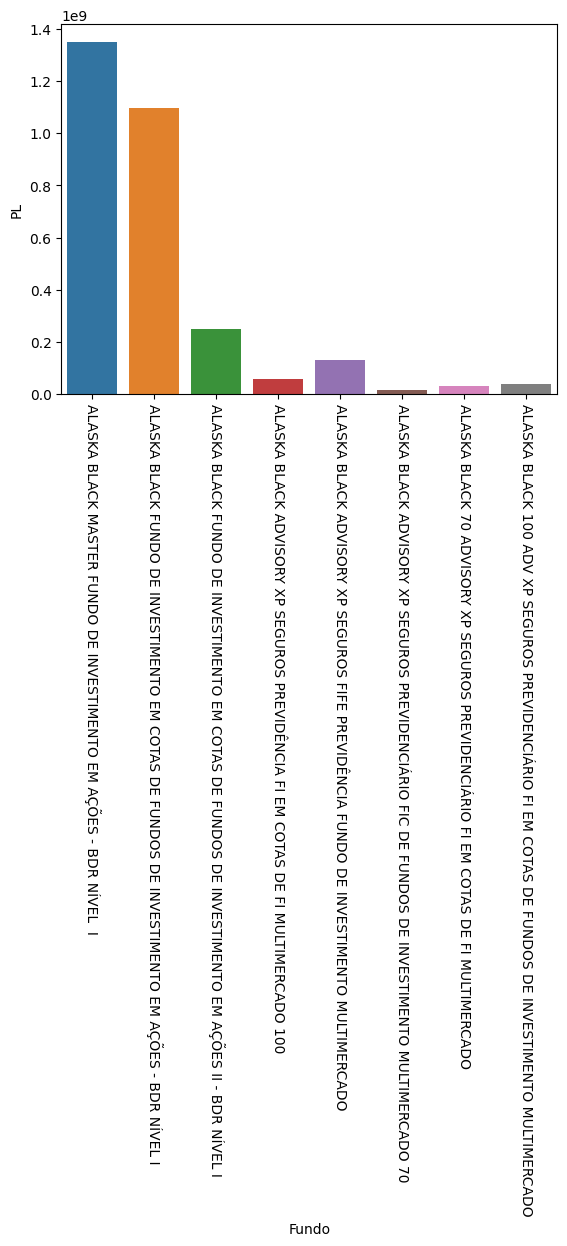

In [110]:
sns.barplot(data=fundo_df, x=fundo_df.Fundo, y=fundo_df.PL)
plt.xticks(rotation=270);

#### 3.4. Fundos que mais subiram e que mais caíram

##### 3.4.1. Manipulações iniciais nos dados

Filtrando fundos pelo número de cotistas

In [111]:
filtro = informes_diarios[informes_diarios['NR_COTST']> 1000]

In [112]:
filtro.head()

,index,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
23,24,FI,00.068.305/0001-35,2023-08-01,38146599.43,33.765570,38140273.11,0.0,6507.17,6111
24,25,FI,00.068.305/0001-35,2023-08-02,38171349.17,33.785428,38162704.68,0.0,0.00,6111
25,26,FI,00.068.305/0001-35,2023-08-03,38191579.87,33.802958,38180609.63,0.0,1895.89,6109
26,27,FI,00.068.305/0001-35,2023-08-04,38212193.58,33.819188,38198902.64,0.0,38.53,6108
27,28,FI,00.068.305/0001-35,2023-08-07,38160740.35,33.834391,38144962.55,0.0,71111.87,6106


In [113]:
fundos = filtro.pivot(index = 'DT_COMPTC', columns = 'CNPJ_FUNDO', values = ['VL_TOTAL', 'VL_QUOTA', 'VL_PATRIM_LIQ'])

In [118]:
normalizados = fundos['VL_QUOTA']/fundos['VL_QUOTA'].iloc[0]
normalizados

CNPJ_FUNDO,00.068.305/0001-35,00.071.477/0001-68,00.222.725/0001-24,00.222.816/0001-60,00.280.302/0001-60,00.306.278/0001-91,00.322.699/0001-06,00.360.293/0001-18,00.398.561/0001-90,00.400.490/0001-13,...,60.906.179/0001-72,67.976.449/0001-60,68.599.141/0001-06,68.623.479/0001-56,68.670.512/0001-07,73.899.759/0001-21,88.002.696/0001-36,88.198.056/0001-43,97.519.703/0001-62,97.519.794/0001-36
DT_COMPTC,,,,,,,,,,,,,,,,,,,,,
2023-08-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-08-02,1.000588,1.000442,1.000485,1.000708,1.000627,1.000521,1.000580,1.001418,0.993952,1.002123,...,1.000523,0.996732,1.000449,1.000588,0.975868,0.996731,0.997128,1.010028,1.000672,1.000525
2023-08-03,1.001107,1.000896,1.001211,1.001482,1.001114,1.001065,1.001182,1.015993,0.992204,1.006490,...,1.001071,0.994409,1.000898,1.001108,0.964554,0.994434,0.995741,1.018282,1.001085,1.001047
2023-08-04,1.001588,1.001333,1.001770,1.002012,1.001700,1.001604,1.001758,1.013676,0.989023,1.004821,...,1.001610,0.985440,1.001338,1.001589,0.952632,0.985496,0.988363,1.022622,1.001458,1.001607
2023-08-07,1.002038,1.001766,1.002205,1.002140,1.002093,1.002148,1.002335,1.019972,0.987418,1.003267,...,1.002156,0.984349,1.001782,1.002039,0.950474,0.984448,0.986437,1.010669,1.001719,1.002125
2023-08-08,1.002542,1.002203,1.002753,1.003163,1.002944,1.002692,1.002918,1.021264,0.985150,1.003246,...,1.002702,0.981894,1.002219,1.002543,0.942134,0.982016,0.984695,1.007894,1.002286,1.002655
2023-08-09,1.003085,1.002631,1.003186,1.003679,1.003339,1.003242,1.003499,1.022585,0.976726,1.000839,...,1.003255,0.976211,1.002651,1.003086,0.932713,0.976372,0.977745,1.002058,1.002849,1.003185
2023-08-10,1.003578,1.003052,1.003684,1.004517,1.003853,1.003741,1.004038,1.015372,0.977064,1.001764,...,1.003757,0.975639,1.003076,1.003580,0.927988,0.975821,0.975910,1.000602,1.003620,1.003692
2023-08-11,1.004148,1.003473,1.004428,1.005350,1.004396,1.004262,1.004617,1.021376,0.970738,1.004139,...,1.004278,0.973231,1.003497,1.004150,0.925255,0.973432,0.971156,1.000300,1.004712,1.004195


In [119]:
cotas_normalizadas = pd.DataFrame(normalizados.iloc[-1])

In [121]:
cotas_normalizadas.sort_values(data, ascending = False)[:5]

,2023-08-31
CNPJ_FUNDO,
40.503.169/0001-89,1.101075
34.218.740/0001-10,1.091169
08.336.054/0001-34,1.076299
11.060.594/0001-42,1.076066
24.454.718/0001-16,1.054011


#### **Maiores altas**

In [122]:
altas = (cotas_normalizadas.sort_values(data, ascending = False)[:5][data] - 1)*100

In [123]:
fundo_df = pd.DataFrame(columns = ['Retornos', 'Fundo', 'Classe', 'PL'])
fundo_df

,Retornos,Fundo,Classe,PL


In [124]:
altas.index

Index(['40.503.169/0001-89', '34.218.740/0001-10', '08.336.054/0001-34',
       '11.060.594/0001-42', '24.454.718/0001-16'],
      dtype='object', name='CNPJ_FUNDO')

In [ ]:
df_cadastral[df_cadastral['CNPJ_FUNDO'] == '40.503.169/0001-89']['SIT']

In [125]:
for cnpj in altas.index:
  fundo = df_cadastral[df_cadastral['CNPJ_FUNDO'] == cnpj]
  fundo_df.loc[cnpj] = [altas[altas.index == cnpj].values[0], fundo['DENOM_SOCIAL'].values[0],fundo['CLASSE'].values[0],fundo['VL_PATRIM_LIQ'].values[0]]

In [126]:
fundo_df

,Retornos,Fundo,Classe,PL
40.503.169/0001-89,10.107455,VITREO URANIO FUNDO DE INVESTIMENTO MULTIMERCADO,Fundo Multimercado,4.847594e+07
34.218.740/0001-10,9.116947,TREND CANNABIS FUNDO DE INVESTIMENTO MULTIMERCADO,Fundo Multimercado,2.043933e+07
08.336.054/0001-34,7.629897,SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETRO...,Fundo de Ações,1.382738e+08
11.060.594/0001-42,7.606607,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS...,Fundo de Ações,9.808040e+07
24.454.718/0001-16,5.401112,JPMORGAN DOLAR GLOBAL MACRO OPPORTUNITIES FI M...,Fundo Multimercado,1.473935e+08


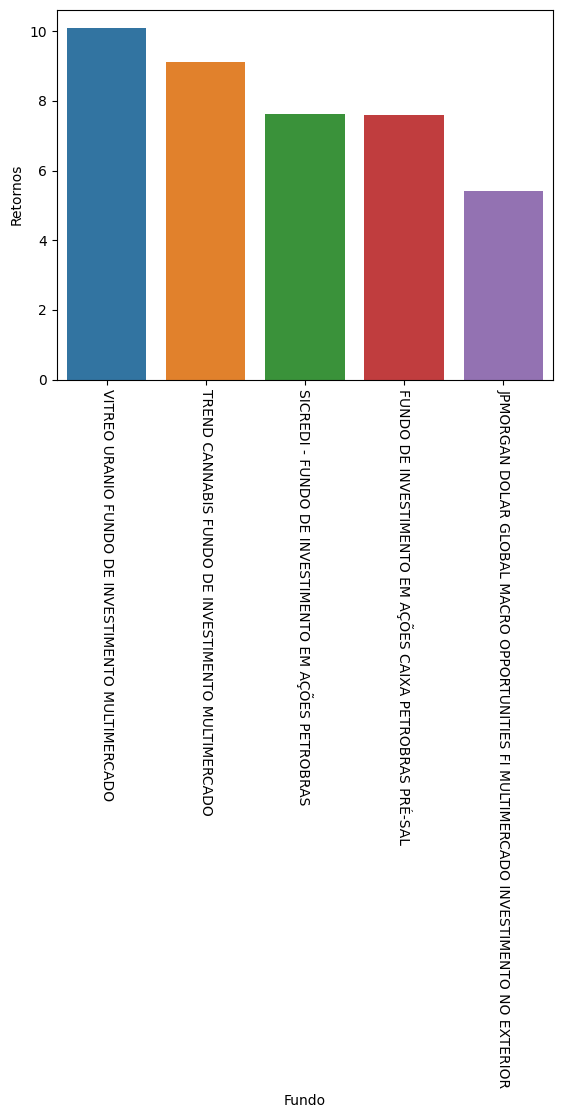

In [128]:
sns.barplot(data=fundo_df, x=fundo_df.Fundo, y=fundo_df.Retornos)
plt.xticks(rotation=270);

#### **Maiores quedas**

In [129]:
baixas = (cotas_normalizadas.sort_values(data, ascending = True)[:5][data] - 1)*100
baixas

CNPJ_FUNDO
10.590.125/0001-72   -19.391173
10.869.628/0001-81   -19.217062
11.182.072/0001-13   -19.211365
18.832.847/0001-06   -16.303957
41.033.759/0001-58   -12.491931
Name: 2023-08-31, dtype: float64

In [130]:
fundo_df = pd.DataFrame(columns = ['Retornos', 'Fundo', 'Classe', 'PL'])
fundo_df

,Retornos,Fundo,Classe,PL


In [131]:
baixas.index

Index(['10.590.125/0001-72', '10.869.628/0001-81', '11.182.072/0001-13',
       '18.832.847/0001-06', '41.033.759/0001-58'],
      dtype='object', name='CNPJ_FUNDO')

In [132]:
for cnpj in baixas.index:
  fundo = df_cadastral[df_cadastral['CNPJ_FUNDO'] == cnpj]
  fundo_df.loc[cnpj] = [baixas[baixas.index == cnpj].values[0], fundo['DENOM_SOCIAL'].values[0],fundo['CLASSE'].values[0],fundo['VL_PATRIM_LIQ'].values[0]]

In [133]:
fundo_df

,Retornos,Fundo,Classe,PL
10.590.125/0001-72,-19.391173,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES CIELO,Fundo de Ações,1.078374e+07
10.869.628/0001-81,-19.217062,BB AÇÕES CIELO FUNDO DE INVESTIMENTO,Fundo de Ações,3.014265e+07
11.182.072/0001-13,-19.211365,LOGOS TOTAL RETURN FI EM COTAS DE FUNDOS DE IN...,Fundo Multimercado,1.322786e+08
18.832.847/0001-06,-16.303957,VERSA LONG BIASED FUNDO DE INVESTIMENTO MULTIM...,Fundo Multimercado,7.588203e+07
41.033.759/0001-58,-12.491931,EMPIRICUS CRIPTO HIGH BETA FIC FI MULTIMERCADO...,Fundo Multimercado,2.325526e+07


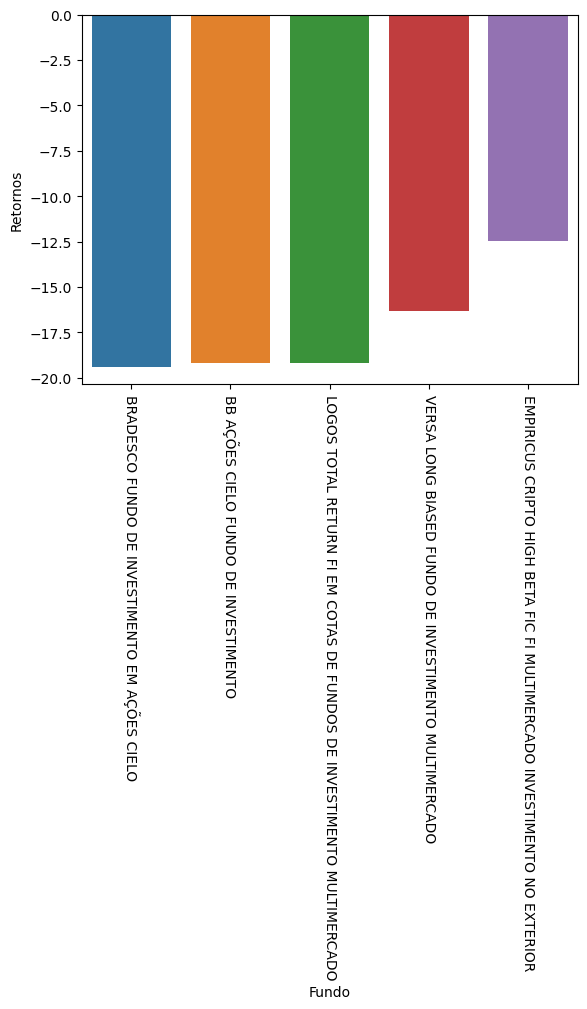

In [134]:
sns.barplot(data=fundo_df, x=fundo_df.Fundo, y=fundo_df.Retornos)
plt.xticks(rotation=270);